In [2]:
# 1 - Importar Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
janeiro = pd.read_csv("JANEIRO.csv", sep=";", encoding="latin-1", dtype=str, low_memory=False)
fevereiro = pd.read_csv("FEVEREIRO.csv", sep=";", encoding="latin-1", dtype=str, low_memory=False)
marco = pd.read_csv("MARCO.csv", sep=";", encoding="latin-1", dtype=str, low_memory=False)
abril = pd.read_csv("ABRIL.csv", sep=";", encoding="latin-1", dtype=str, low_memory=False)
maio = pd.read_csv("MAIO.csv", sep=";", encoding="latin-1", dtype=str, low_memory=False)
junho = pd.read_csv("JUNHO.csv", sep=";", encoding="latin-1", dtype=str, low_memory=False)
julho = pd.read_csv("JULHO.csv", sep=";", encoding="latin-1", dtype=str, low_memory=False)
agosto = pd.read_csv("AGOSTO.csv", sep=";", encoding="latin-1", dtype=str, low_memory=False)
setembro = pd.read_csv("SETEMBRO.csv", sep=";", encoding="latin-1", dtype=str, low_memory=False)
outubro = pd.read_csv("OUTUBRO.csv", sep=";", encoding="latin-1", dtype=str, low_memory=False)
novembro = pd.read_csv("NOVEMBRO.csv", sep=";", encoding="latin-1", dtype=str, low_memory=False)
dezembro = pd.read_csv("DEZEMBRO.csv", sep=";", encoding="latin-1", dtype=str, low_memory=False)

tot_sp = pd.concat([janeiro, fevereiro, marco, abril, maio, junho, julho, agosto, setembro, outubro, novembro, dezembro], ignore_index=True)
display(tot_sp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ï»¿COMP                 2570 non-null   object
 1   REGIAO                  2570 non-null   object
 2   UF                      2570 non-null   object
 3   MUNICIPIO               2570 non-null   object
 4   NOME_ESTABELECIMENTO    2570 non-null   object
 5   RAZAO_SOCIAL            2570 non-null   object
 6   DS_TIPO_UNIDADE         2570 non-null   object
 7   DESC_NATUREZA_JURIDICA  2570 non-null   object
 8   NO_LOGRADOURO           2570 non-null   object
 9   NU_ENDERECO             2570 non-null   object
 10  NO_BAIRRO               2570 non-null   object
 11  CO_CEP                  2570 non-null   object
 12  LEITOS_EXISTENTES       2570 non-null   object
 13  LEITOS_SUS              2570 non-null   object
 14  UTI_TOTAL_EXIST         2570 non-null   object
 15  UTI_

None

In [5]:
import pandas as pd

# Garantir que o CEP é numérico (sem hífen e com zeros à esquerda)
tot_sp['CO_CEP'] = (
    tot_sp['CO_CEP']
    .astype(str)
    .str.replace(r'\D', '', regex=True)
    .str.zfill(8)
)

def identificar_zona(cep):
    try:
        cep_int = int(cep[:6])  # pega apenas os 5 primeiros dígitos
    except ValueError:
        return 'Desconhecida'

    if 0o1000 <= cep_int <= 15999:
        return 'Centro'
    elif 0o20000 <= cep_int <= 29999:
        return 'Zona Norte'
    elif 0o30000 <= cep_int <= 39999 or 80000 <= cep_int <= 84999:
        return 'Zona Leste'
    elif 0o40000 <= cep_int <= 49999 or 56000 <= cep_int <= 59999:
        return 'Zona Sul'
    elif 0o50000 <= cep_int <= 55999:
        return 'Zona Oeste'
    else:
        return 'Desconhecida'

# Criar nova coluna com as zonas
tot_sp['ZONA'] = tot_sp['CO_CEP'].apply(identificar_zona)

# Salvar o DataFrame consolidado em CSV
tot_sp.to_csv("Consolidado_SP.csv", sep=";", encoding="utf-8", index=False)

# Conferir contagem por zona
print(tot_sp['ZONA'].value_counts())

# Exibir amostra
display(tot_sp[['CO_CEP', 'ZONA']].head(10))


ZONA
Zona Sul      917
Zona Leste    621
Centro        496
Zona Norte    294
Zona Oeste    242
Name: count, dtype: int64


,CO_CEP,ZONA
0,01309010,Centro
1,02806160,Zona Norte
2,01401002,Centro
3,04916000,Zona Sul
4,04556901,Zona Sul
5,05686902,Zona Sul
6,05513100,Zona Oeste
7,04120070,Zona Sul
8,04734003,Zona Sul
9,04304010,Zona Sul


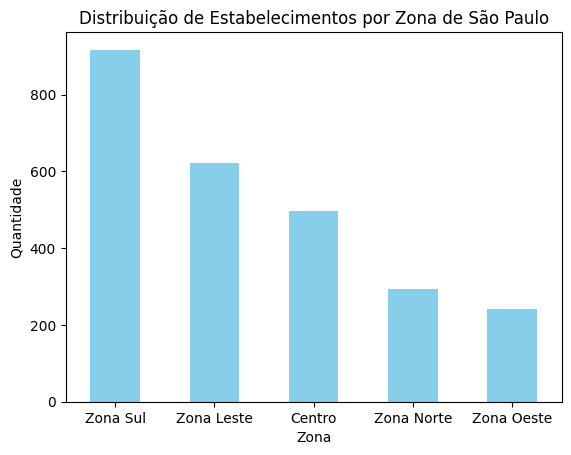

In [6]:
import matplotlib.pyplot as plt

tot_sp['ZONA'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuição de Estabelecimentos por Zona de São Paulo')
plt.xlabel('Zona')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()
